# </font> <font color = #4854E8> RANDOM FOREST </font>

Random Forrest is a supervised algorithm used for both classification and regression problems too. We can see it from a supervised algorithm to create a forest in some way & make it random. The larger the number of trees the more accurate results.

##  Information of Dataset
<b> Heart Failure Prediction: </b>This database contains 76 attributes, but all published experiments refer to using a subset of 12 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. 
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

#### Attribute Information
`Age:` age of the patient [years] <br>

`Sex:` sex of the patient [M: Male, F: Female] <br>

`ChestPainType:` chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br>

`RestingBP:` resting blood pressure [mm Hg] <br>

`Cholesterol:` serum cholesterol [mm/dl] <br>

`FastingBS:` fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br>

`RestingECG:` resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

`MaxHR:` maximum heart rate achieved [Numeric value between 60 and 202] <br>

`ExerciseAngina:` exercise-induced angina [Y: Yes, N: No] <br>

`Oldpeak:` oldpeak = ST [Numeric value measured in depression] <br>

`ST_Slope:` the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] <br>

`HeartDisease:` output class [1: heart disease, 0: Normal] <br>

<b> Importing the libraries </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

<b> Importing the Dataset </b>

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<b> Data Summery and Visulaization </b>

In [3]:
#Data shape
print('The number of columns :',df.shape[0])
print('The number of rows    :',df.shape[1])

The number of columns : 918
The number of rows    : 12


In [4]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Data describe
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<b> Categorical cols </b>

In [6]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [7]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Sex has ['M' 'F'] values

ChestPainType has ['ATA' 'NAP' 'ASY' 'TA'] values

RestingECG has ['Normal' 'ST' 'LVH'] values

ExerciseAngina has ['N' 'Y'] values

ST_Slope has ['Up' 'Flat' 'Down'] values



<b> Numerical cols </b>

In [8]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

<b> Checking the realtionship between the features </b>

<Figure size 1152x648 with 0 Axes>

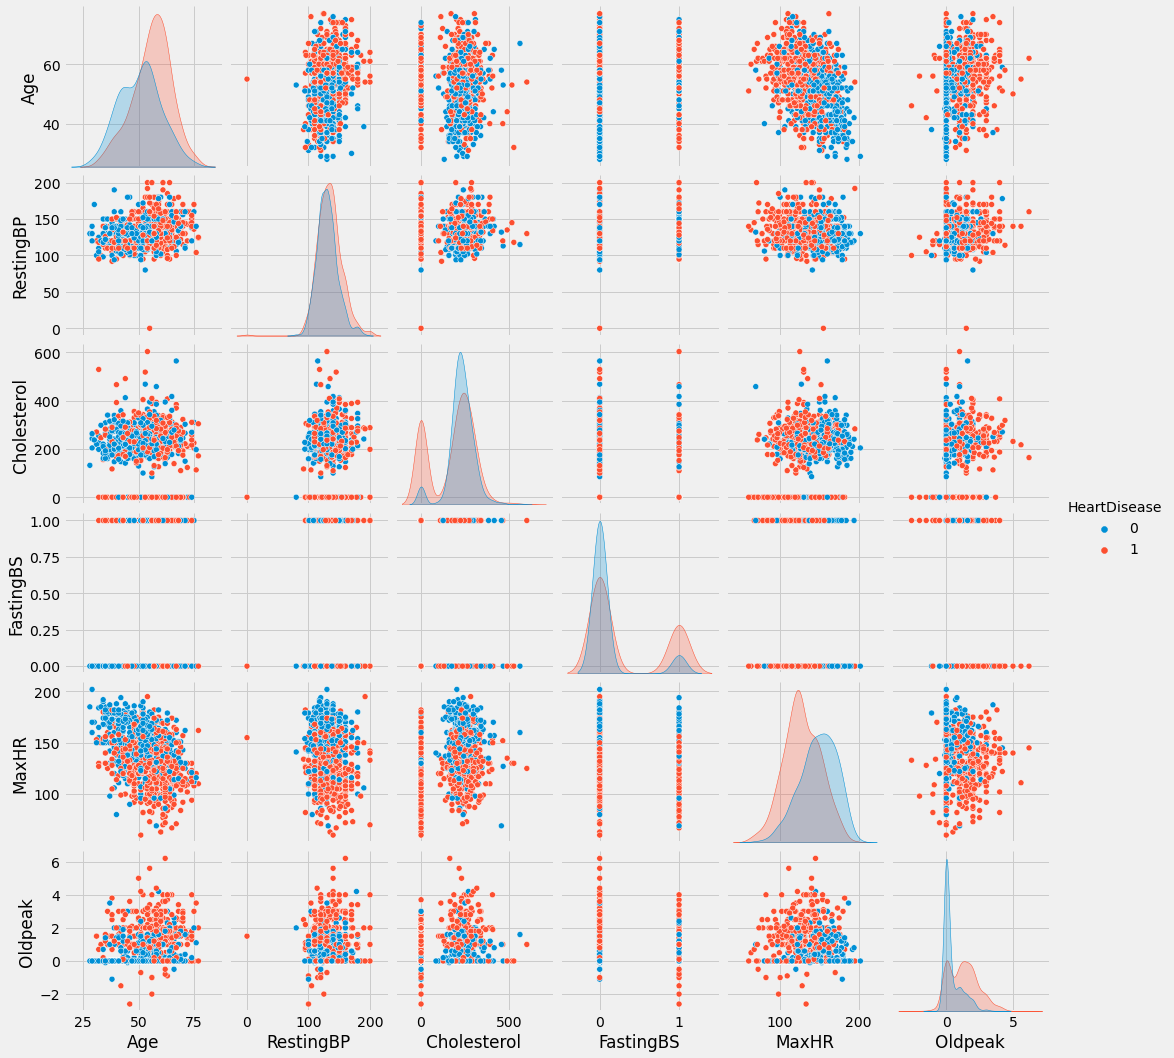

In [9]:
plt.figure(figsize = (16, 9))
sns.pairplot(df, hue = 'HeartDisease')

<b> Check the correlation between the features </b>

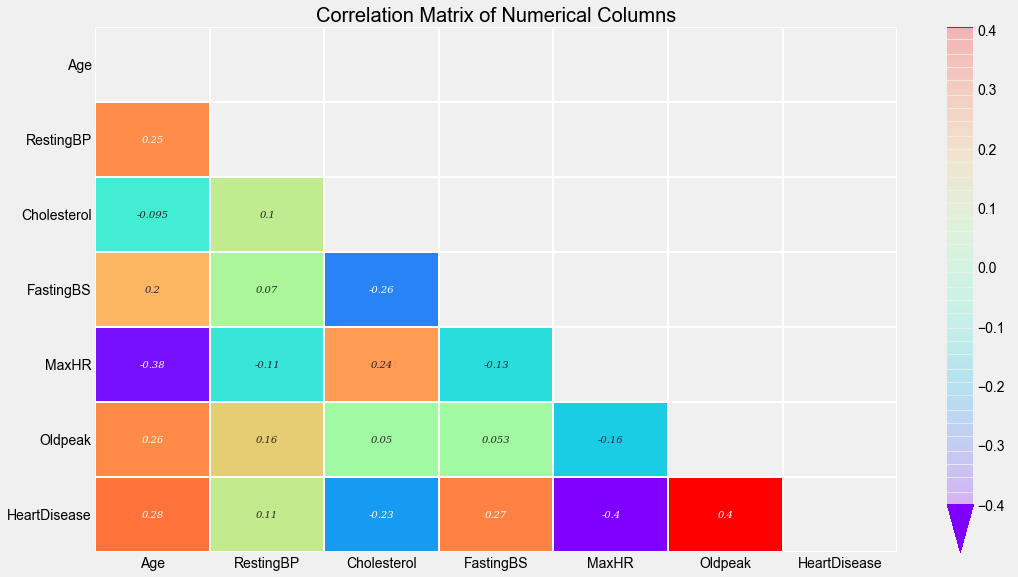

In [10]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of Numerical Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

<b> Data Preprocessing </b>

<b> Check for the missing values </b>

In [11]:
# check if there is any missing value
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<b> Defining the Predictor and Target Attribute </b>

In [12]:
X = df.iloc[:, 0:11]
y = df.iloc[:, -1]

In [13]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [14]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

<b> One Hot Encoder </b>

In [15]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

Sex has ['M' 'F'] values

ChestPainType has ['ATA' 'NAP' 'ASY' 'TA'] values

RestingECG has ['Normal' 'ST' 'LVH'] values

ExerciseAngina has ['N' 'Y'] values

ST_Slope has ['Up' 'Flat' 'Down'] values



In [16]:
X[cat_cols].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [17]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1


<b> Converting into ndarray </b>

In [18]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
X = X.to_numpy()
y = y.to_numpy()

In [20]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<b> Split data into train and test </b>

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
#Training Data
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (734, 15)
Y_train (734,)


In [23]:
#Testing Data
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (184, 15)
X_test (184,)


# Build Random Forest Classifier Model

In this part, we build Random Forrest Classifier Model with sklearn.

<b> Importing the model from sklearn and initiize the model </b>

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=12, n_estimators=1000, random_state=42)

<b> Fitting the training data into the model </b>

In [25]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12, n_estimators=1000, random_state=42)

<b> Predict the test data </b>

In [26]:
y_pred = clf.predict(X_test)

# Evaluate the Result

In this part, we evaluate the Random Forrest model. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

<b> Confusion matrix </b>

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

<AxesSubplot:>

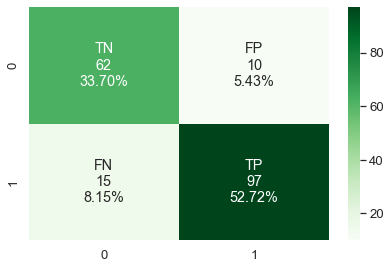

In [28]:
confusion_matrix_Scratch = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

<b> Calculate the results </b>

In [29]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_pred, y_test)
print('ROC Area:', Roc)

Accuracy Score: 0.8641304347826086
Precision Score: 0.9065420560747663
True positive Rate: 0.8660714285714286
False positive Rate 0.1388888888888889
F1 Score: 0.8858447488584474
Specificity: 0.8611111111111112
Mean Absolute Error: 0.1358695652173913
ROC Area: 0.8635912698412699
